## Dilated Neural Network

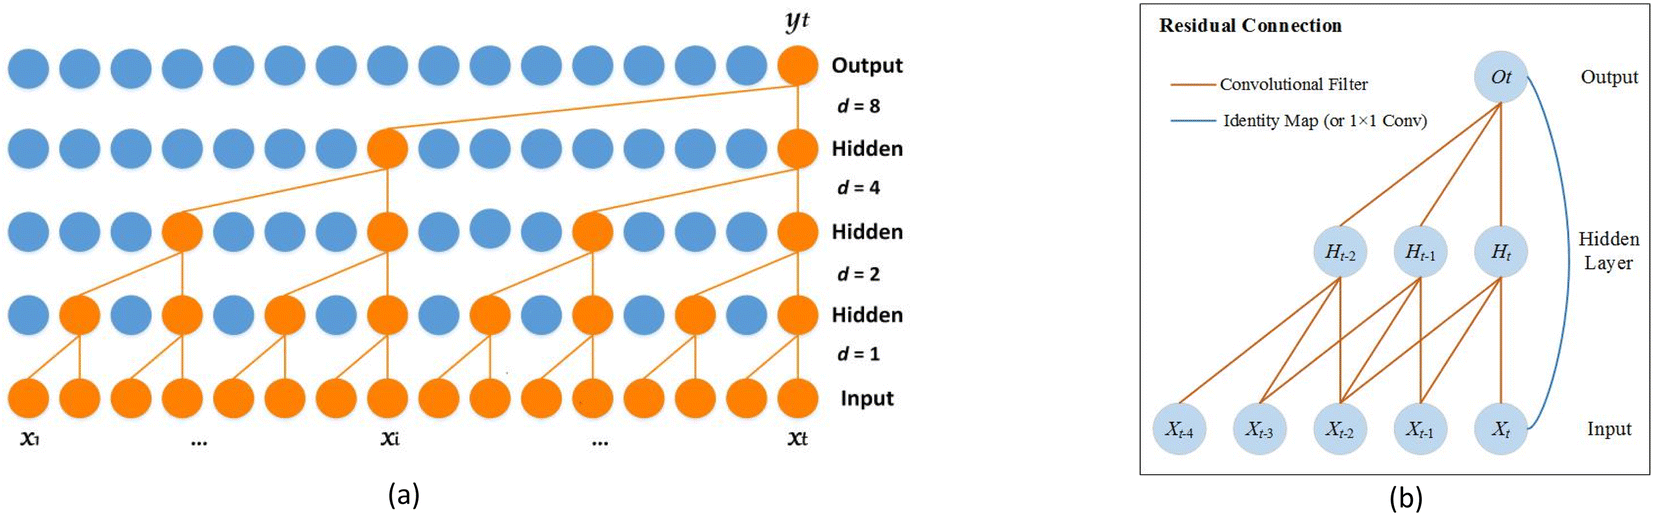

Dilated Convolutional Neural Networks (CNNs) stand out in the realm of deep learning, offering a unique approach to feature extraction and processing. Their versatility finds application across various domains, with one notable use being in image processing tasks. Unlike traditional CNNs, dilated CNNs can capture multi-scale features without significantly inflating computational costs. 

Additionally, dilated CNNs find utility in natural language processing (NLP) tasks, such as text classification and sentiment analysis. By treating text as a one-dimensional sequence, these networks adeptly capture local and global dependencies, thereby facilitating more nuanced understanding and representation learning from textual data. Furthermore, their inherent ability to handle sparse data and maintain memory efficiency distinguishes dilated CNNs from other models, making them scalable for large-scale datasets and resource-constrained environments. Overall, the multi-scale receptive fields and memory-efficient architecture of dilated CNNs make them a powerful tool in the deep learning toolbox, enabling advancements in diverse fields ranging from computer vision to natural language processing and beyond.  

#### Imports

In [6]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.metrics import AUC

# Load the dataframe from pickle
with open('labeled_df.pkl', 'rb') as f:
    labeled_df = pickle.load(f)



In [9]:
# Function to convert a sequence to one-hot encoding
def one_hot_encode(seq):
    # Mapping of nucleotides to integers
    mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'N': 4}
    # Create a zero matrix of size (len(seq), 5)
    one_hot = np.zeros((len(seq), 5), dtype=np.int8)
    # Fill the appropriate positions
    for i, nucleotide in enumerate(seq):
        if nucleotide in mapping:
            one_hot[i, mapping[nucleotide]] = 1
    return one_hot

# Applying one-hot encoding to extracted DNA sequences
def encode_sequences(df):
    # Applying the one-hot encoding to each row in the dataframe using the 'sequence' column
    df['one_hot_data'] = df['Sequence'].apply(one_hot_encode)
    return df

# Apply encoding to the labeled DataFrame
encoded_df = encode_sequences(labeled_df)
print("DataFrame encoded. First encoded sequence shape:", encoded_df['one_hot_data'].iloc[0].shape)

DataFrame encoded. First encoded sequence shape: (1068, 5)


In [ ]:
# Splitting data into features (X) and labels (y)
X = np.array(df['one_hot_data'].tolist())  # Assuming 'One_hot_data' contains your one-hot encoded sequences
y = np.array(df['label'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Choosing the Model

Dilated Neural Networks, as compared to algorithms like Basset, offer a robust solution for classifying in Bioinformatics. By employing dilated convolutions, these networks can excel in capturing both local and global dependencies within DNA sequences, crucial for discerning binding amidst genomic noise. Basset, for instance, employs a convolutional network tailored for biological sequence data. With this in mind, it can effectively learn the hierarchical features representing binding site patterns. This approach proves particularly adept at identifying regulatory elements like transcription factor binding sites, further understanding gene expression regulation. Furthermore, DNNs just like Basset can adapt to diverse genomic contexts and can accommodate for various types of binding data. This allows us the chance to create Networks capable of comprehensive analysis in Bioinformatics research.

In [76]:
# Model
def create_model(kernel_size, filter_size, pool_size, dilation_rate):
    model = Sequential([
        Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu', dilation_rate=dilation_rate, input_shape=(800, 5)),
        MaxPooling1D(pool_size=pool_size),
        Conv1D(filters=filter_size*2, kernel_size=kernel_size, activation='relu', dilation_rate=dilation_rate * 2),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['AUC'])
    return model

# Example usage:
# model = create_model(kernel_size=3, filter_size=32, pool_size=2, dilation_rate=1)
# model.summary()

c:\Users\jlucasmartinezwork\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 798, 32)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 399, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 395, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 197, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12608)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │       806,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,761 (3.10 MB)

 Trainable params: 813,761 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

#### Testing and Training

In the exploration of the dilated model, there are several key hyperparameters worth investigating for an optimal performance. First, we considered experimenting with kernel sizes to capture diverse patterns within sequences. While a kernel size of 3 performed ok, testing larger sizes like 5 or 7 enhanced the model's ability to discern broader features. Secondly, we tried increasing the filter sizes from 32 to 64 or 128, so that the network could learn more intricate representations. However, overfitting often occurred here. Thirdly, the Pooling layers played a crucial role in down-sampling. During exploring different pool sizes, like 3 or 4, we could find more essential information from feature maps. However, the smaller pool sizes with strides of 2 achieved similar effects with fewer parameters. Lastly, the Dilation rates set at 1 and 2, was the key part of the Dilated CNN. Experimenting with larger rates, like (1, 2, 4), offered more insights when capturing a broader range of information vital for tasks like binding site classification. Throughout the exploration, the goal of the model's performance was to improve generalization rather than overfitting.

In [2]:
kernel_sizes = [3, 5, 7]
filter_sizes = [32, 64, 128]
pool_sizes = [2, 3, 4]
dilation_rates = [1, 2]
num_classes = 10  # Adjust this according to the number of classes in your dataset

In [ ]:
for kernel_size in kernel_sizes:
    for filter_size in filter_sizes:
        for pool_size in pool_sizes:
            for dilation_rate in dilation_rates:
                 # Create the model
                model = create_model(kernel_size, filter_size, pool_size, dilation_rate, optimizer)
                    
                # Print model summary
                model.summary()
                    
                # Train the model
                model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)
                    
                # Evaluate the model
                evaluation = model.evaluate(X_val, y_val, verbose=0)
                print("Evaluation (kernel_size={}, filter_size={}, pool_size={}, dilation_rate={}, optimizer={}): Loss = {:.4f}, AUC = {:.4f}".format(
                    kernel_size, filter_size, pool_size, dilation_rate, optimizer, evaluation[0], evaluation[1]))

In [77]:
# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/3
9737/9737 ━━━━━━━━━━━━━━━━━━━━ 214s 22ms/step - accuracy: 0.9239 - loss: 0.1769 - val_accuracy: 0.9790 - val_loss: 0.0585
Epoch 2/3
9737/9737 ━━━━━━━━━━━━━━━━━━━━ 194s 20ms/step - accuracy: 0.9763 - loss: 0.0648 - val_accuracy: 0.9815 - val_loss: 0.0501
Epoch 3/3
9737/9737 ━━━━━━━━━━━━━━━━━━━━ 165s 17ms/step - accuracy: 0.9839 - loss: 0.0440 - val_accuracy: 0.9700 - val_loss: 0.0781


#### Results and Conclusion